In [0]:
!pip install mnist==0.2.2 


In [0]:
import numpy as np
import mnist

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
#from tf.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import np_utils
#from tf.keras.utils import to_categorical
from tensorflow.python.keras.optimizers import SGD
import os
import cv2
from google.colab.patches import cv2_imshow
from skimage.morphology import label
import pickle

from matplotlib import pyplot as plt
from tqdm import tqdm_notebook
import random
from skimage.io import imread, imshow, imread_collection, concatenate_images
from matplotlib import pyplot as plt

60000 (28, 28) 60000 5
10000 (28, 28) 10000 7


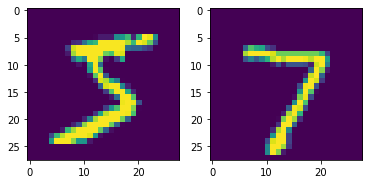

In [0]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(len(train_images),train_images[0].shape,len(train_labels),train_labels[0])
plt.subplot(1,2,1)
plt.imshow(train_images[0])
print(len(test_images),test_images[0].shape,len(test_labels),test_labels[0])
plt.subplot(1,2,2)
plt.imshow(test_images[0])

In [0]:

# Set numeric type to float32 from uint8
train_images= train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = (train_images / 255) 
test_images = (test_images / 255) 


train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

print(train_images.shape,test_images.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
train_labels=np_utils.to_categorical(train_labels,num_classes=10)
test_labels=np_utils.to_categorical(test_labels,num_classes=10)

In [0]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=train_images.shape[1:], padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1),  activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1),  activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [0]:
hist = model.fit(train_images,train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.6799 - accuracy: 0.8297 - val_loss: 0.3321 - val_accuracy: 0.9095
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3078 - accuracy: 0.9126 - val_loss: 0.2558 - val_accuracy: 0.9278
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2500 - accuracy: 0.9283 - val_loss: 0.2154 - val_accuracy: 0.9408
Epoch 4/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2148 - accuracy: 0.9383 - val_loss: 0.1915 - val_accuracy: 0.9470
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1898 - accuracy: 0.9456 - val_loss: 0.1702 - val_accuracy: 0.9534
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.1708 - accuracy: 0.9515 - val_loss: 0.1536 - val_accuracy: 0.9575
Epoch 7/10
60000/60000 [==============================] - 5s 80us/

In [0]:
test_score = model.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 1s 114us/step
Test loss 0.1134, accuracy 96.89%


Text(0, 0.5, 'acc')

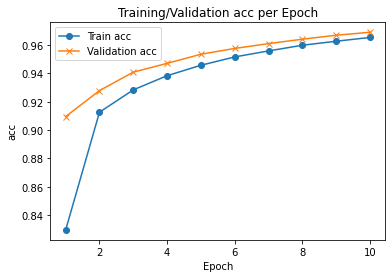

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

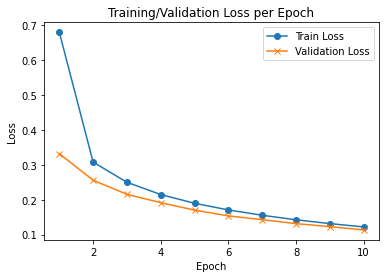

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [0]:
print("Using LENET from scratch")

Using LENET from scratch


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

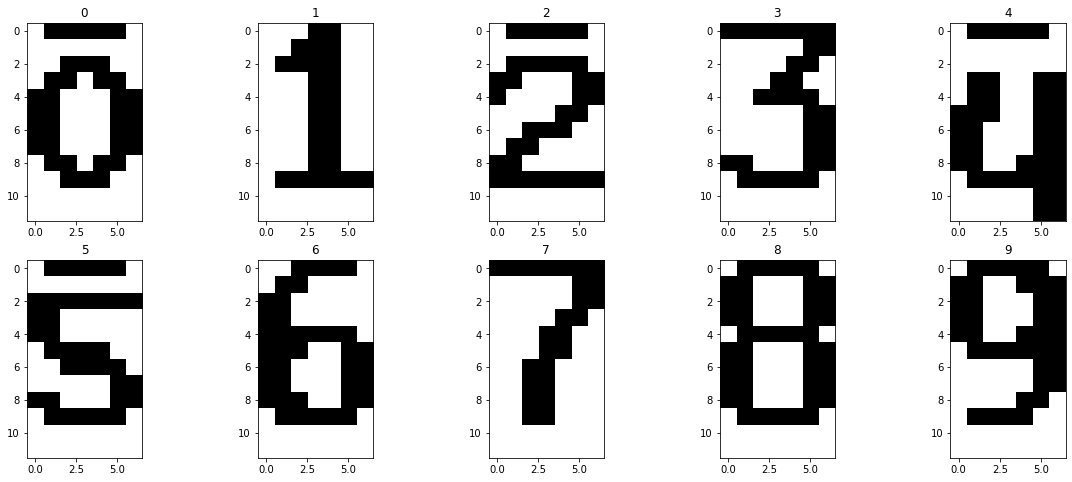

In [0]:
# initialize as +1 & -1
bitmap = np.zeros((10,84))
bitmap[0]=np.array([
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, +1, +1, +1, -1, -1] + \
    [-1, +1, +1, -1, +1, +1, -1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [-1, +1, +1, -1, +1, +1, -1] + \
    [-1, -1, +1, +1, +1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[1]=np.array([
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, +1, +1, +1, -1, -1] + \
    [-1, +1, +1, +1, +1, -1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, +1, +1, +1, +1, +1, +1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[2]=np.array([
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, +1, +1, +1, +1, +1, -1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, +1, +1, -1] + \
    [-1, -1, +1, +1, +1, -1, -1] + \
    [-1, +1, +1, -1, -1, -1, -1] + \
    [+1, +1, -1, -1, -1, -1, -1] + \
    [+1, +1, +1, +1, +1, +1, +1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[3]=np.array([
    [+1, +1, +1, +1, +1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, +1, +1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[4]=np.array([
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, +1, +1, -1, -1, +1, +1] + \
    [-1, +1, +1, -1, -1, +1, +1] + \
    [+1, +1, +1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, +1, +1, +1] + \
    [-1, +1, +1, +1, +1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] \
])
bitmap[5]=np.array([
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [+1, +1, +1, +1, +1, +1, +1] + \
    [+1, +1, -1, -1, -1, -1, -1] + \
    [+1, +1, -1, -1, -1, -1, -1] + \
    [-1, +1, +1, +1, +1, -1, -1] + \
    [-1, -1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[6]=np.array([
    [-1, -1, +1, +1, +1, +1, -1] + \
    [-1, +1, +1, -1, -1, -1, -1] + \
    [+1, +1, -1, -1, -1, -1, -1] + \
    [+1, +1, -1, -1, -1, -1, -1] + \
    [+1, +1, +1, +1, +1, +1, -1] + \
    [+1, +1, +1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, +1, -1, -1, +1, +1] + \
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[7]=np.array([
    [+1, +1, +1, +1, +1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, +1, +1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, -1, +1, +1, -1, -1] + \
    [-1, -1, +1, +1, -1, -1, -1] + \
    [-1, -1, +1, +1, -1, -1, -1] + \
    [-1, -1, +1, +1, -1, -1, -1] + \
    [-1, -1, +1, +1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[8]=np.array([
    [-1, +1, +1, +1, +1, +1, -1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [-1, +1, +1, +1, +1, +1, -1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [-1, +1, +1, +1, +1, +1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
bitmap[9]=np.array([
    [-1, +1, +1, +1, +1, +1, -1] + \
    [+1, +1, -1, -1, +1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, -1, +1, +1] + \
    [+1, +1, -1, -1, +1, +1, +1] + \
    [-1, +1, +1, +1, +1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, -1, +1, +1] + \
    [-1, -1, -1, -1, +1, +1, -1] + \
    [-1, +1, +1, +1, +1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] + \
    [-1, -1, -1, -1, -1, -1, -1] \
])
fig, axarr = plt.subplots(2,5,figsize=(20,8))
for i in range(10):
    x,y = int(i/5), i%5

    axarr[x,y].set_title(str(i))
    axarr[x,y].imshow(bitmap[i,:].reshape(12,7), cmap=mpl.cm.Greys)



In [0]:
def rbf_init_weight():
    return bitmap

In [0]:
import struct
import numpy as np
import math
import random

# read the images and labels
def readDataset(dataset):
    (image, label) = dataset
    with open(label, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(image, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return (img, lbl)

# padding for the matrix of images
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0, ), (pad, ), (pad, ), (0, )), 'constant', constant_values=(0, 0))    
    return X_pad

# normalization of the input images
def normalize(image, mode='lenet5'):
    image -= image.min()
    image = image / image.max()
    # range = [0,1]
    if mode == '0p1':
        return image
    # range = [-1,1]
    elif mode == 'n1p1':
        image = image * 2 - 1
    # range = [-0.1,1.175]   
    elif mode == 'lenet5':
        image = image * 1.275 - 0.1
    return image

# initialization of the weights & bias
def initialize(kernel_shape, mode='Fan-in'):
    b_shape = (1,1,1,kernel_shape[-1]) if len(kernel_shape)==4 else (kernel_shape[-1],)
    if mode == 'Gaussian_dist':
        mu, sigma = 0, 0.1
        weight = np.random.normal(mu, sigma,  kernel_shape) 
        bias   = np.ones(b_shape)*0.01
        
    elif mode == 'Fan-in': #original init. in the paper
        Fi = np.prod(kernel_shape)/kernel_shape[-1]
        weight = np.random.uniform(-2.4/Fi, 2.4/Fi, kernel_shape)    
        bias   = np.ones(b_shape)*0.01     
    return weight, bias

# update for the weights
def update(weight, bias, dW, db, vw, vb, lr, momentum=0, weight_decay=0):
    vw_u = momentum*vw - weight_decay*lr*weight - lr*dW
    vb_u = momentum*vb - weight_decay*lr*bias   - lr*db
    weight_u = weight + vw_u
    bias_u   = bias   + vb_u
    return weight_u, bias_u, vw_u, vb_u 

# return random-shuffled mini-batches
def random_mini_batches(image, label, mini_batch_size = 256, one_batch=False):
    m = image.shape[0]                  # number of training examples
    mini_batches = []
    
    # Shuffle (image, label)
    permutation = list(np.random.permutation(m))
    shuffled_image = image[permutation,:,:,:]
    shuffled_label = label[permutation]
    
    # extract only one batch
    if one_batch:
        mini_batch_image = shuffled_image[0: mini_batch_size,:,:,:]
        mini_batch_label = shuffled_label[0: mini_batch_size]
        return (mini_batch_image, mini_batch_label)

    # Partition (shuffled_image, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_image = shuffled_image[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_label = shuffled_label[k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_image, mini_batch_label)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_image = shuffled_image[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_label = shuffled_label[num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_image, mini_batch_label)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [0]:
import numpy as np

def pool_forward(A_prev, hparameters, mode):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    A = np.zeros((m, n_H, n_W, n_C))      
    for h in range(n_H):                      # loop on the vertical axis of the output volume
        for w in range(n_W):                  # loop on the horizontal axis of the output volume
            # Use the corners to define the current slice on the ith training example of A_prev, channel c
            A_prev_slice = A_prev[:, h*stride:h*stride+f, w*stride:w*stride+f, :]  
            # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. 
            if mode == "max":
                A[:, h, w, :] = np.max(A_prev_slice, axis=(1,2))
            elif mode == "average":
                A[:, h, w, :] = np.average(A_prev_slice, axis=(1,2))

    cache = (A_prev, hparameters)
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

def pool_backward(dA, cache, mode):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    (A_prev, hparameters) = cache
    
    stride = hparameters["stride"]
    f = hparameters["f"]

    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape #256,28,28,6
    m, n_H, n_W, n_C = dA.shape                    #256,14,14,6
    
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev)) #256,28,28,6
        
    for h in range(n_H):                    # loop on the vertical axis
        for w in range(n_W):                # loop on the horizontal axis
            # Find the corners of the current "slice"
            vert_start, horiz_start  = h*stride, w*stride
            vert_end,   horiz_end    = vert_start+f, horiz_start+f
            
            # Compute the backward propagation in both modes.
            if mode == "max":
                A_prev_slice = A_prev[:, vert_start: vert_end, horiz_start: horiz_end, :] 
                A_prev_slice = np.transpose(A_prev_slice, (1,2,3,0))
                mask = A_prev_slice==A_prev_slice.max((0,1))           
                mask = np.transpose(mask, (3,2,0,1))                   
                dA_prev[:, vert_start: vert_end, horiz_start: horiz_end, :] \
                      += np.transpose(np.multiply(dA[:, h, w, :][:,:,np.newaxis,np.newaxis],mask), (0,2,3,1))

            elif mode == "average":
                da = dA[:, h, w, :][:,np.newaxis,np.newaxis,:]  #256*1*1*6
                dA_prev[:, vert_start: vert_end, horiz_start: horiz_end, :] += np.repeat(np.repeat(da, 2, axis=1), 2, axis=2)/f/f
    
    assert(dA_prev.shape == A_prev.shape)
    return dA_prev

def subsampling_forward(A_prev, weight, b, hparameters):
    A_, cache = pool_forward(A_prev, hparameters, 'average') 
    A = A_ * weight + b
    cache_A = (cache, A_)
    return A, cache_A_

def subsampling_backward(dA, weight, b, cache_A_):
    (cache, A_) = cache_A_
    db = dA
    dW = np.sum(np.multiply(dA, A_))
    dA_ = dA * weight
    dA_prev = pool_backward(dA_, cache, 'average') 
    return dA_prev, dW, db


In [0]:
class ConvLayer(object):
    def __init__(self, kernel_shape, hparameters, init_mode='Gaussian_dist'):
        """
        kernel_shape: (n_f, n_f, n_C_prev, n_C)
        hparameters = {"stride": s, "pad": p}
        """
        self.hparameters = hparameters
        self.weight, self.bias = initialize(kernel_shape, init_mode)
        self.v_w, self.v_b = np.zeros(kernel_shape), np.zeros((1,1,1,kernel_shape[-1]))
        
    def foward_prop(self, input_map):
        output_map, self.cache = conv_forward(input_map, self.weight, self.bias, self.hparameters)
        return output_map
    
    def back_prop(self, dZ, momentum, weight_decay):
        dA_prev, dW, db = conv_backward(dZ, self.cache)
        self.weight, self.bias, self.v_w, self.v_b = \
            update(self.weight, self.bias, dW, db, self.v_w, self.v_b, self.lr, momentum, weight_decay)
        return dA_prev  
    
    def SDLM(self, d2Z, mu, lr_global):
        d2A_prev, d2W = conv_SDLM(d2Z, self.cache)
        h = np.sum(d2W)/d2Z.shape[0]
        self.lr = lr_global / (mu + h)
        return d2A_prev  
    
# C3: Convlayer with assigned combination between input maps and weight
class ConvLayer_maps(object):
    def __init__(self, kernel_shape, hparameters, mapping, init_mode='Gaussian_dist'):
        """
        kernel_shape: (n_f, n_f, n_C_prev, n_C)
        hparameters = {"stride": s, "pad": p}
        """
        self.hparameters = hparameters
        self.mapping     = mapping
        self.wb   = []      # list of [weight, bias]
        self.v_wb = []      # list of [v_w,    v_b]
        for i in range(len(self.mapping)):
            weight_shape = (kernel_shape[0], kernel_shape[1], len(self.mapping[i]), 1)
            w, b = initialize(weight_shape, init_mode)
            self.wb.append([w, b])
            self.v_wb.append([np.zeros(w.shape), np.zeros(b.shape)])
        
    def foward_prop(self, input_map):
        self.iputmap_shape = input_map.shape #(n_m,14,14,6)
        self.caches = []
        output_maps = []
        for i in range(len(self.mapping)):
            output_map, cache = conv_forward(input_map[:,:,:,self.mapping[i]], self.wb[i][0], self.wb[i][1], self.hparameters)
            output_maps.append(output_map)
            self.caches.append(cache)
        output_maps = np.swapaxes(np.array(output_maps),0,4)[0]
        return output_maps
    
    def back_prop(self, dZ, momentum, weight_decay):
        dA_prevs = np.zeros(self.iputmap_shape)
        for i in range(len(self.mapping)):
            dA_prev, dW, db = conv_backward(dZ[:,:,:,i:i+1], self.caches[i])
            self.wb[i][0], self.wb[i][1], self.v_wb[i][0], self.v_wb[i][1] =\
                update(self.wb[i][0], self.wb[i][1], dW, db, self.v_wb[i][0], self.v_wb[i][1], self.lr, momentum, weight_decay)
            dA_prevs[:,:,:,self.mapping[i]] += dA_prev
        return dA_prevs 
    
    # Stochastic Diagonal Levenberg-Marquaedt
    def SDLM(self, d2Z, mu, lr_global):
        h = 0
        d2A_prevs = np.zeros(self.iputmap_shape)
        for i in range(len(self.mapping)):
            d2A_prev, d2W = conv_SDLM(d2Z[:,:,:,i:i+1], self.caches[i])
            d2A_prevs[:,:,:,self.mapping[i]] += d2A_prev
            h += np.sum(d2W)
        self.lr = lr_global / (mu + h/d2Z.shape[0])
        return d2A_prevs 

class PoolingLayer(object):
    def __init__(self, hparameters, mode):
        self.hparameters = hparameters
        self.mode = mode
        
    def foward_prop(self, input_map):   # n,28,28,6 / n,10,10,16
        A, self.cache = pool_forward(input_map, self.hparameters, self.mode)
        return A
    
    def back_prop(self, dA):
        dA_prev = pool_backward(dA, self.cache, self.mode)
        return dA_prev
    
    def SDLM(self, d2A):
        d2A_prev = pool_backward(d2A, self.cache, self.mode)
        return d2A_prev

class Subsampling(object):
    def __init__(self, n_kernel, hparameters):
        self.hparameters = hparameters
        self.weight = np.random.normal(0, 0.1, (1,1,1,n_kernel)) 
        self.bias   = np.random.normal(0, 0.1, (1,1,1,n_kernel)) 
        self.v_w = np.zeros(self.weight.shape)
        self.v_b = np.zeros(self.bias.shape)
        
    def foward_prop(self, input_map):   # n,28,28,6 / n,10,10,16
        A, self.cache = subsampling_forward(input_map, self.weight, self.bias, self.hparameters)
        return A
    
    def back_prop(self, dA, momentum, weight_decay):
        dA_prev, dW, db = subsampling_backward(dA, A_, weight, b, self.cache)
        self.weight, self.bias, self.v_w, self.v_b = \
            update(self.weight, self.bias, dW, db, self.v_w, self.v_b, self.lr, momentum, weight_decay)
        return dA_prev
    
    # Stochastic Diagonal Levenberg-Marquaedt
    def SDLM(self, d2A, mu, lr_global):
        d2A_prev, d2W, _ = subsampling_backward(dA, A_, weight, b, self.cache)
        h = np.sum(d2W)/d2A.shape[0]
        self.lr = lr_global / (mu + h)
        return d2A_prev

class Activation(object):
    def __init__(self, mode):    
        (act, d_act), actfName = activation_func()
        act_index  = actfName.index(mode)
        self.act   = act[act_index]
        self.d_act = d_act[act_index]
        
    def foward_prop(self, input_image): 
        self.input_image = input_image
        return self.act(input_image)
    
    def back_prop(self, dZ):
        dA = np.multiply(dZ, self.d_act(self.input_image)) 
        return dA
    
    # Stochastic Diagonal Levenberg-Marquaedt
    def SDLM(self, d2Z):  #d2_LeNet5_squash
        dA = np.multiply(d2Z, np.power(self.d_act(self.input_image),2)) 
        return dA

class FCLayer(object):
    def __init__(self, weight_shape, init_mode='Gaussian_dist'): 
        
        # Initialization
        self.v_w, self.v_b = np.zeros(weight_shape), np.zeros((weight_shape[-1],))
        self.weight, self.bias = initialize(weight_shape, init_mode)
        
    def foward_prop(self, input_array):
        self.input_array = input_array  #(n_m, 120)
        return np.matmul(self.input_array, self.weight) # (n_m, 84)
        
    def back_prop(self, dZ, momentum, weight_decay):
        dA = np.matmul(dZ, self.weight.T)               # (n_m, 84) * (84, 120) = (n_m, 120)
        dW = np.matmul(self.input_array.T, dZ)          # (n_m, 120).T * (n_m, 84) = (120, 84)
        db = np.sum(dZ.T, axis=1)                       # (84,)
        
        self.weight, self.bias, self.v_w, self.v_b = \
            update(self.weight, self.bias, dW, db, self.v_w, self.v_b, self.lr, momentum, weight_decay)
        return dA
    
    # Stochastic Diagonal Levenberg-Marquaedt
    def SDLM(self, d2Z, mu, lr_global):
        d2A = np.matmul(d2Z, np.power(self.weight.T,2))
        d2W = np.matmul(np.power(self.input_array.T,2), d2Z)
        h = np.sum(d2W)/d2Z.shape[0]
        self.lr = lr_global / (mu + h)
        return d2A
    
# not even slightly work
class RBFLayer_trainable_weight(object):
    def __init__(self, weight_shape, init_weight=None, init_mode='Gaussian_dist'): 
        self.weight_shape = weight_shape # =(10, 84)
        self.v_w = np.zeros(weight_shape)

        if init_weight.shape == (10,84):
            self.weight = init_weight
        else:
            self.weight, _ = initialize(weight_shape, init_mode)
        
    def foward_prop(self, input_array, label, mode): 
        """
        input_array = (n_m, 84)
        label = (n_m, )
        """
        
        if mode == 'train':
            self.input_array = input_array
            self.weight_label = self.weight[label,:]  #(n_m, 84) labeled version of weight
            loss = 0.5 * np.sum(np.power(input_array - self.weight_label, 2), axis=1, keepdims=True)  #(n_m, )
            return np.sum(np.squeeze(loss))
        
        if mode == 'test':
            subtract_weight = (input_array[:,np.newaxis,:] - np.array([self.weight]*input_array.shape[0])) # (n_m,10,84)
            rbf_class = np.sum(np.power(subtract_weight,2), axis=2) # (n_m, 10)
            class_pred = np.argmin(rbf_class, axis=1) # (n_m,)
            error01 = np.sum(label != class_pred)
            return error01, class_pred

    def back_prop(self, label, lr, momentum, weight_decay):
        #n_m = label.shape[0]
        
        #d_output = np.zeros((n_m, n_class))
        #d_output[range(n_m), label] = 1    # (n_m, 10)  one-hot version of gradient w.r.t. output
        
        dy_predict = -self.weight_label + self.input_array    #(n_m, 84)
        
        dW_target  = -dy_predict                              #(n_m, 84)
        
        dW = np.zeros(self.weight_shape) # (10,84)
        
        for i in range(len(label)):  
            dW[label[i],:] += dW_target[i,:]
            
        self.v_w = momentum*self.v_w - weight_decay*lr*self.weight - lr*dW
        self.weight += self.v_w

        return dy_predict

bitmap = rbf_init_weight()

class RBFLayer(object):
    def __init__(self, weight):        
        self.weight = weight  # (10, 84)
        
    def foward_prop(self, input_array, label, mode): 
        """
        input_array = (n_m, 84)
        label = (n_m, )
        """
        if mode == 'train':
            self.input_array = input_array
            self.weight_label = self.weight[label,:]  #(n_m, 84) labeled version of weight
            loss = 0.5 * np.sum(np.power(input_array - self.weight_label, 2), axis=1, keepdims=True)  #(n_m, )
            return np.sum(np.squeeze(loss))
        if mode == 'test':
            # (n_m,1,84) - n_m*[(10,84)] = (n_m,10,84)
            subtract_weight = (input_array[:,np.newaxis,:] - np.array([self.weight]*input_array.shape[0])) # (n_m,10,84)
            rbf_class = np.sum(np.power(subtract_weight,2), axis=2) # (n_m, 10)
            class_pred = np.argmin(rbf_class, axis=1) # (n_m,)
            error01 = np.sum(label != class_pred)
            return error01, class_pred
        
    def back_prop(self):
        dy_predict = -self.weight_label + self.input_array    #(n_m, 84)
        return dy_predict
    
    def SDLM(self):
        # d2y_predict
        return np.ones(self.input_array.shape)
    
    
class LeNet5(object):
    def __init__(self):
        kernel_shape = {"C1": (5,5,1,6),
                        "C3": (5,5,6,16),    ### C3 has designated combinations
                        "C5": (5,5,16,120),  ### It's actually a FC layer
                        "F6": (120,84),
                        "OUTPUT": (84,10)}
        
        hparameters_convlayer = {"stride": 1, "pad": 0}
        hparameters_pooling   = {"stride": 2, "f": 2}        
        
        self.C1 = ConvLayer(kernel_shape["C1"], hparameters_convlayer)
        self.a1 = Activation("LeNet5_squash")
        self.S2 = PoolingLayer(hparameters_pooling, "average")
        
        self.C3 = ConvLayer_maps(kernel_shape["C3"], hparameters_convlayer, C3_mapping)
        self.a2 = Activation("LeNet5_squash")
        self.S4 = PoolingLayer(hparameters_pooling, "average")
        
        self.C5 = ConvLayer(kernel_shape["C5"], hparameters_convlayer)
        self.a3 = Activation("LeNet5_squash")

        self.F6 = FCLayer(kernel_shape["F6"])
        self.a4 = Activation("LeNet5_squash")
        
        #self.Output = RBFLayer(kernel_shape["OUTPUT"], bitmap)
        self.Output = RBFLayer(bitmap)
        
    def Forward_Propagation(self, input_image, input_label, mode): 
        self.label = input_label
        self.C1_FP = self.C1.foward_prop(input_image)
        self.a1_FP = self.a1.foward_prop(self.C1_FP)
        self.S2_FP = self.S2.foward_prop(self.a1_FP)

        self.C3_FP = self.C3.foward_prop(self.S2_FP)
        self.a2_FP = self.a2.foward_prop(self.C3_FP)
        self.S4_FP = self.S4.foward_prop(self.a2_FP)

        self.C5_FP = self.C5.foward_prop(self.S4_FP)
        self.a3_FP = self.a3.foward_prop(self.C5_FP)

        self.flatten = self.a3_FP[:,0,0,:]
        self.F6_FP = self.F6.foward_prop(self.flatten)
        self.a4_FP = self.a4.foward_prop(self.F6_FP)  
        
        # output sum of the loss over mini-batch when mode = 'train'
        # output class when mode = 'test'
        out  = self.Output.foward_prop(self.a4_FP, input_label, mode) 

        return out 
        
    def Back_Propagation(self, momentum, weight_decay):
        dy_pred = self.Output.back_prop()
        
        dy_pred = self.a4.back_prop(dy_pred)
        F6_BP = self.F6.back_prop(dy_pred, momentum, weight_decay)
        reverse_flatten = F6_BP[:,np.newaxis,np.newaxis,:]
        
        reverse_flatten = self.a3.back_prop(reverse_flatten) 
        C5_BP = self.C5.back_prop(reverse_flatten, momentum, weight_decay)
        
        S4_BP = self.S4.back_prop(C5_BP)
        S4_BP = self.a2.back_prop(S4_BP)
        C3_BP = self.C3.back_prop(S4_BP, momentum, weight_decay) 
        
        S2_BP = self.S2.back_prop(C3_BP)
        S2_BP = self.a1.back_prop(S2_BP)  
        C1_BP = self.C1.back_prop(S2_BP, momentum, weight_decay)
        
    # Stochastic Diagonal Levenberg-Marquaedt method for determining the learning rate 
    def SDLM(self, mu, lr_global):
        d2y_pred = self.Output.SDLM()
        d2y_pred = self.a4.SDLM(d2y_pred)
        
        F6_SDLM = self.F6.SDLM(d2y_pred, mu, lr_global)
        reverse_flatten = F6_SDLM[:,np.newaxis,np.newaxis,:]
        
        reverse_flatten = self.a3.SDLM(reverse_flatten) 
        C5_SDLM = self.C5.SDLM(reverse_flatten, mu, lr_global)
        
        S4_SDLM = self.S4.SDLM(C5_SDLM)
        S4_SDLM = self.a2.SDLM(S4_SDLM)
        C3_SDLM = self.C3.SDLM(S4_SDLM, mu, lr_global)
        
        S2_SDLM = self.S2.SDLM(C3_SDLM)
        S2_SDLM = self.a1.SDLM(S2_SDLM)  
        C1_SDLM = self.C1.SDLM(S2_SDLM, mu, lr_global)

In [0]:
import numpy as np 
from scipy.signal import convolve2d

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    n_H = int((n_H_prev + 2*pad - f)/stride + 1)
    n_W = int((n_W_prev + 2*pad - f)/stride + 1)
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros((m, n_H, n_W, n_C))
    A_prev_pad = zero_pad(A_prev, pad)
    for h in range(n_H):                            # loop over vertical axis of the output volume
        for w in range(n_W):                        # loop over horizontal axis of the output volume
            # Use the corners to define the (3D) slice of a_prev_pad.
            A_slice_prev = A_prev_pad[:, h*stride:h*stride+f, w*stride:w*stride+f, :]
            #print(np.tensordot(A_slice_prev, W, axes=([1,2,3],[0,1,2])).shape, b.shape)
            # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron.
            Z[:, h, w, :] = np.tensordot(A_slice_prev, W, axes=([1,2,3],[0,1,2])) + b
                            
    assert(Z.shape == (m, n_H, n_W, n_C))
    cache = (A_prev, W, b, hparameters)
    return Z, cache

# Numpy version: compute with np.dot
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """

    (A_prev, W, b, hparameters) = cache
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape

    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    (m, n_H, n_W, n_C) = dZ.shape
    
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))
    
    if pad != 0:
        A_prev_pad = zero_pad(A_prev, pad)
        dA_prev_pad = zero_pad(dA_prev, pad)
    else:
        A_prev_pad = A_prev
        dA_prev_pad = dA_prev
    
    for h in range(n_H):                    # loop over vertical axis of the output volume
        for w in range(n_W):                # loop over horizontal axis of the output volume
            # Find the corners of the current "slice"
            vert_start, horiz_start  = h*stride, w*stride
            vert_end,   horiz_end    = vert_start+f, horiz_start+f
            
            # Use the corners to define the slice from a_prev_pad
            A_slice = A_prev_pad[:, vert_start:vert_end, horiz_start:horiz_end, :]
            
            # Update gradients for the window and the filter's parameters
            dA_prev_pad[:, vert_start:vert_end, horiz_start:horiz_end, :] += np.transpose(np.dot(W, dZ[:, h, w, :].T), (3,0,1,2))

            dW += np.dot(np.transpose(A_slice, (1,2,3,0)), dZ[:, h, w, :])
            db += np.sum(dZ[:, h, w, :], axis=0)
            
    # Set dA_prev to the unpaded dA_prev_pad
    dA_prev = dA_prev_pad if pad == 0 else dA_prev_pad[:,pad:-pad, pad:-pad, :]
        
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

def conv_SDLM(dZ, cache):
    (A_prev, W, b, hparameters) = cache
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    (m, n_H, n_W, n_C) = dZ.shape
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))
    
    if pad != 0:
        A_prev_pad = zero_pad(A_prev, pad)
        dA_prev_pad = zero_pad(dA_prev, pad)
    else:
        A_prev_pad = A_prev
        dA_prev_pad = dA_prev
    
    for h in range(n_H):                    # loop over vertical axis of the output volume
        for w in range(n_W):                # loop over horizontal axis of the output volume
            # Find the corners of the current "slice"
            vert_start, horiz_start  = h*stride, w*stride
            vert_end,   horiz_end    = vert_start+f, horiz_start+f
            
            # Use the corners to define the slice from a_prev_pad
            A_slice = A_prev_pad[:, vert_start:vert_end, horiz_start:horiz_end, :]
            
            # Update gradients for the window and the filter's parameters
            dA_prev_pad[:, vert_start:vert_end, horiz_start:horiz_end, :] += np.transpose(np.dot(np.power(W,2), dZ[:, h, w, :].T), (3,0,1,2))

            dW += np.dot(np.transpose(np.power(A_slice,2), (1,2,3,0)), dZ[:, h, w, :])
    # Set dA_prev to the unpaded dA_prev_pad
    dA_prev = dA_prev_pad if pad == 0 else dA_prev_pad[:,pad:-pad, pad:-pad, :]
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    return dA_prev, dW

In [0]:
import numpy as np

#Squashing function used in LeNet-5
def LeNet5_squash(x):
    return 1.7159*np.tanh(2*x/3)
def d_LeNet5_squash(x):
    return 1.14393*(1-np.power(tanh(2*x/3),2))
def d2_LeNet5_squash(x):
    return -1.52524*((tanh(2/3*x)))*(1-np.power(tanh(2/3*x),2))

#sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    return np.exp(-x) / np.power((1+np.exp(-x)),2)
def d2_sigmoid(x):
    return 2*np.exp(-2*x)/np.power(np.exp(-x)+1,3)  - np.exp(-x) / np.power((1+np.exp(-x)),2)

#tanh
def tanh(x):
    return np.tanh(x)
def d_tanh(x):
    return 1/np.power(np.cosh(x),2)
def d2_tanh(x):
    return -2*(tanh(x))/np.power(np.cosh(x),2)

#ReLU
def ReLU(x):
    return np.where(x>0, x, 0)
def d_ReLU(x):
    return np.where(x>0, 1, 0)
def d2_ReLU(x):
    return np.zeros(d_ReLU(x).shape)

alpha = {"prelu":0.1, "elu":0.5}
#Parametric ReLU (alpha=0.01 equals to Leaky ReLU)
def PReLU(x, a=alpha["prelu"]):
    return np.where(x>0, x, a*x)
def d_PReLU(x, a=alpha["prelu"]):
    return np.where(x>0, 1, a)
def d2_PReLU(x, a=alpha["prelu"]):
    return np.zeros(d_PReLU(x, a).shape)

#ELU
def ELU(x, a=alpha["elu"]):
    return np.where(x > 0, x, a*(np.exp(x) - 1))
def d_ELU(x, a=alpha["elu"]):
    return np.where(x > 0, 1, ELU(x, a)+a)
def d2_ELU(x, a=alpha["elu"]):
    return np.where(x > 0, 0, ELU(x, a)+a)

def activation_func():
    actf = [LeNet5_squash, sigmoid, tanh, ReLU, PReLU, ELU]
    actfName = [act.__name__ for act in actf]
    d_actf = [d_LeNet5_squash, d_sigmoid, d_tanh, d_ReLU, d_PReLU, d_ELU]
    d_actfName = [d_act.__name__ for d_act in d_actf]
    return (actf, d_actf), actfName

In [0]:
!pip install mnist==0.2.2 
import  mnist
train_image = mnist.train_images()
train_label = mnist.train_labels()
test_image = mnist.test_images()
test_label = mnist.test_labels()


In [0]:
n_m, n_m_test = len(train_label), len(test_label)
print("The shape of training image:", train_image.shape)
print("The shape of testing image: ", test_image.shape)
print("Length of the training set: ", n_m)
print("Length of the training set: ", n_m_test)
print("Shape of a single image: ", train_image[0].shape)

The shape of training image: (60000, 28, 28)
The shape of testing image:  (10000, 28, 28)
Length of the training set:  60000
Length of the training set:  10000
Shape of a single image:  (28, 28)


In [0]:
import numpy as np 
import sys
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import time

train_image_normalized_pad = normalize(zero_pad(train_image[:,:,:,np.newaxis], 2),'lenet5')
test_image_normalized_pad  = normalize(zero_pad(test_image[:,:,:,np.newaxis],  2),'lenet5')
print("The shape of training image with padding:", train_image_normalized_pad.shape)
print("The shape of testing image with padding: ", test_image_normalized_pad.shape)

The shape of training image with padding: (60000, 32, 32, 1)
The shape of testing image with padding:  (10000, 32, 32, 1)


In [0]:
# Designate combination of kernels and feature maps of S2.
C3_mapping = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,0],[5,0,1],\
              [0,1,2,3],[1,2,3,4],[2,3,4,5],[3,4,5,0],[4,5,0,1],[5,0,1,2],\
              [0,1,3,4],[1,2,4,5],[0,2,3,5],\
              [0,1,2,3,4,5]]

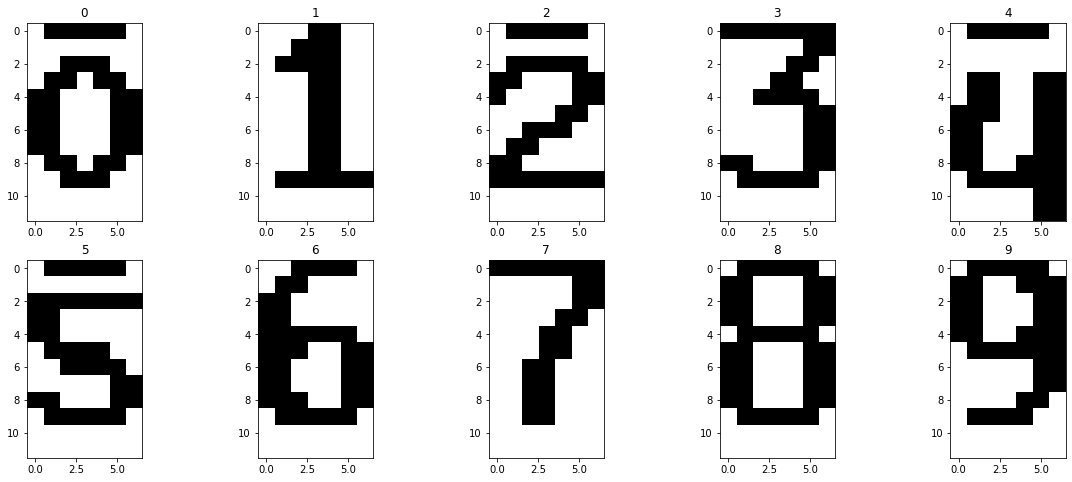

In [0]:
# The fixed weight (7x12 preset ASCII bitmaps) used in the RBF layer.
bitmap = rbf_init_weight()
fig, axarr = plt.subplots(2,5,figsize=(20,8))
for i in range(10):
    x,y = int(i/5), i%5
    axarr[x,y].set_title(str(i))
    axarr[x,y].imshow(bitmap[i,:].reshape(12,7), cmap=mpl.cm.Greys)

In [0]:
ConvNet = LeNet5()

In [0]:
# Number of epoches & learning rate in the original paper
epoch_orig, lr_global_orig = 20, np.array([5e-4]*2 + [2e-4]*3 + [1e-4]*3 + [5e-5]*4 + [1e-5]*8) 

# Number of epoches & learning rate I used
epoches, lr_global_list = epoch_orig, lr_global_orig*100

momentum = 0.9
weight_decay = 0
batch_size = 256

In [0]:
#Training loops
st = time.time()
cost_last, count = np.Inf, 0
err_rate_list = []
for epoch in range(0,epoches):
    print("---------- epoch", epoch+1, "begin ----------")
    
    # Stochastic Diagonal Levenberg-Marquaedt method for determining the learning rate 
    (batch_image, batch_label) = random_mini_batches(train_image_normalized_pad, train_label, mini_batch_size = 500, one_batch=True)
    ConvNet.Forward_Propagation(batch_image, batch_label, 'train')
    lr_global = lr_global_list[epoch]
    ConvNet.SDLM(0.02, lr_global)
    
    # print info
    print("global learning rate:", lr_global)
    print("learning rates in trainable layers:", np.array([ConvNet.C1.lr, ConvNet.C3.lr, ConvNet.C5.lr, ConvNet.F6.lr]))
    print("batch size:", batch_size)
    print("Momentum:",momentum,", weight decay:",weight_decay)
    
    #loop over each batch
    ste = time.time()
    cost = 0
    mini_batches = random_mini_batches(train_image_normalized_pad, train_label, batch_size)
    for i in range(len(mini_batches)):
        batch_image, batch_label = mini_batches[i]
        
        loss = ConvNet.Forward_Propagation(batch_image, batch_label, 'train')     
        cost += loss
        
        ConvNet.Back_Propagation(momentum, weight_decay) 

        # print progress
        if i%(int(len(mini_batches)/100))==0:
            sys.stdout.write("\033[F")   #CURSOR_UP_ONE
            sys.stdout.write("\033[K")   #ERASE_LINE
            print ("progress:", int(100*(i+1)/len(mini_batches)), "%, ", "cost =", cost, end='\r')
    sys.stdout.write("\033[F")   #CURSOR_UP_ONE
    sys.stdout.write("\033[K")   #ERASE_LINE
    
    print ("Done, cost of epoch", epoch+1, ":", cost,"                                             ")
    
    error01_train, _ = ConvNet.Forward_Propagation(train_image_normalized_pad, train_label, 'test')  
    error01_test, _  = ConvNet.Forward_Propagation(test_image_normalized_pad,  test_label,  'test')     
    err_rate_list.append([error01_train/60000, error01_test/10000])
    print("0/1 error of training set:",  error01_train, "/", len(train_label))
    print("0/1 error of testing set: ",  error01_test,  "/", len(test_label))
    print("Time used: ",time.time() - ste, "sec")
    print("---------- epoch", epoch+1, "end ------------")
    with open('model_data_'+str(epoch)+'.pkl', 'wb') as output:
        pickle.dump(ConvNet, output, pickle.HIGHEST_PROTOCOL)
    %notebook -e foo.ipynb
    
err_rate_list = np.array(err_rate_list).T
print("Total time used: ", time.time() - st, "sec")


---------- epoch 1 begin ----------
global learning rate: 0.05
learning rates in trainable layers: [1.15324876e-05 1.58236450e-05 2.41475452e-05 2.39520556e-05]
batch size: 256
Momentum: 0.9 , weight decay: 0
Done, cost of epoch 1 : 694499.8958301668                                              
